In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats


## Load files with evaluated training

In [ ]:
import pandas as pd
import os
# Create a nested dictionary tau-->seed
tau_levels = [0.1,0.5,0.7]
tau_levels_str = [str(tau).replace('.', '') for tau in tau_levels]
seed_list = [53,274,1234,89] 


base_path = "C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/training_outcome/"
dfs = {}

for tau_str in tau_levels_str:
    dfs[tau_str] = {}
    for seed in seed_list:
        folder_name = f"RUN_2025-05-17_dirichlet_weighted_quantile_entropy_standard{seed}_{tau_str}"
        file_path = os.path.join(base_path, folder_name, "train_df_with_shares.csv")

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dfs[tau_str][seed] = df
        else:
            print(f" File not found: {file_path}")


In [3]:
tau_levels = [0.1,0.5,0.7]
tau_levels_str = [str(tau).replace('.', '') for tau in tau_levels]
seed_list = [53,274,1234,89] 

base_path = "C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/training_outcome/"
dfs_metrics = {}
#  folder_name = f"RUN_2025-05-17_gauss_weighted_quantile_entropy_standard{seed}_{tau_str}"

for tau_str in tau_levels_str:
    dfs_metrics[tau_str] = {}
    for seed in seed_list:
        folder_name = f"RUN_2025-05-17_gauss_weighted_quantile_entropy_standard{seed}_{tau_str}"
        file_path = os.path.join(base_path, folder_name, "metrics.pkl")

        if os.path.exists(file_path):
            df = pd.read_pickle(file_path)
            dfs_metrics[tau_str][seed] = df
        else:
            print(f" File not found: {file_path}")

In [6]:
for tau_str, seed_dict in dfs.items():
    for seed, df in seed_dict.items():
        print(f"tau: {tau_str}, seed: {seed}, df shape: {df.shape}")


tau: 01, seed: 53, df shape: (1406, 27)
tau: 01, seed: 274, df shape: (1406, 27)
tau: 01, seed: 1234, df shape: (1406, 27)
tau: 01, seed: 89, df shape: (1406, 27)
tau: 05, seed: 53, df shape: (1406, 27)
tau: 05, seed: 274, df shape: (1406, 27)
tau: 05, seed: 1234, df shape: (1406, 27)
tau: 05, seed: 89, df shape: (1406, 27)
tau: 07, seed: 53, df shape: (1406, 27)
tau: 07, seed: 274, df shape: (1406, 27)
tau: 07, seed: 1234, df shape: (1406, 27)
tau: 07, seed: 89, df shape: (1406, 27)


In [216]:
dfs["01"][53]


,date,emerging_equity,fixed_income_balanced,min_vol,momentum,quality,size,value,emerging_equity_share,fixed_income_balanced_share,...,v_03,v_04,v_05,v_06,v_07,v_08,v_09,value_function,absolute_return,cumulative_return
0,2016-11-10,36.1501,99.5000,44.13,74.860,67.63,69.3565,67.0400,0.098172,0.109127,...,-3.387959,-1.245368,-0.076625,1.408305,3.039733,6.631576,18.251186,-27.162495,-0.260183,-0.260183
1,2016-11-11,35.4699,99.0700,44.06,74.760,67.56,69.2800,67.1000,0.092093,0.230625,...,-3.400227,-0.757855,0.538778,2.248559,3.986558,8.216292,20.739760,-28.966480,-0.139401,-0.399584
2,2016-11-14,35.0200,98.9077,44.00,74.150,67.38,69.6100,67.7928,0.077211,0.132960,...,-3.174294,-0.443317,0.765705,2.296731,3.844672,8.260879,22.215055,-31.859740,0.570545,0.170961
3,2016-11-15,35.8000,99.0600,44.25,74.850,67.67,70.3000,68.3300,0.065565,0.083590,...,-3.854824,-1.265241,-0.117269,1.232145,2.631927,6.620753,19.393177,-31.342312,0.057114,0.228075
4,2016-11-16,35.8000,99.0692,44.30,75.070,67.78,70.1800,68.0100,0.053956,0.142863,...,-4.083638,-1.456235,-0.259910,1.081228,2.545285,6.467768,18.157558,-28.748077,0.297813,0.525888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2022-06-28,43.3600,85.1207,70.10,137.195,112.62,111.6400,92.0900,0.076766,0.550133,...,-5.751525,-3.527795,-2.235949,-0.526759,1.153114,4.641456,12.482536,-12.484245,0.030720,66.091660
1402,2022-06-29,43.1600,85.3912,70.39,136.770,112.41,110.9336,91.2800,0.076754,0.549438,...,-6.335726,-3.907757,-2.476316,-0.683679,1.140381,4.834857,13.346037,-14.339913,0.084273,66.175934
1403,2022-06-30,42.9200,85.8699,70.21,136.370,111.73,110.0300,90.5200,0.077914,0.547184,...,-5.238076,-3.073695,-1.683022,0.016454,1.658997,4.761194,12.410702,-13.288642,0.916304,67.092240
1404,2022-07-01,42.7600,86.3050,71.06,137.830,112.32,111.5100,91.1100,0.077153,0.544721,...,-5.855514,-3.743435,-2.301755,-0.604771,1.094748,4.146657,12.135971,-13.975309,-0.210190,66.882050


In [251]:
dfs["01"][274]


,date,emerging_equity,fixed_income_balanced,min_vol,momentum,quality,size,value,emerging_equity_share,fixed_income_balanced_share,...,v_03,v_04,v_05,v_06,v_07,v_08,v_09,value_function,absolute_return,cumulative_return
0,2016-11-10,36.1501,99.5000,44.13,74.860,67.63,69.3565,67.0400,0.107322,0.119111,...,-3.071918,-0.371114,1.638166,2.959011,5.023147,7.699958,18.107090,-15.864759,-0.249682,-0.249682
1,2016-11-11,35.4699,99.0700,44.06,74.760,67.56,69.2800,67.1000,0.102402,0.106091,...,-2.488928,0.410949,2.283821,3.530076,5.818201,7.892222,17.338158,-13.548616,0.080375,-0.169306
2,2016-11-14,35.0200,98.9077,44.00,74.150,67.38,69.6100,67.7928,0.110724,0.111211,...,-2.781202,0.300555,2.431582,3.705349,5.760585,8.290623,18.799206,-15.242004,0.725914,0.556608
3,2016-11-15,35.8000,99.0600,44.25,74.850,67.67,70.3000,68.3300,0.120194,0.119706,...,-3.825349,-0.890785,0.979255,2.103876,4.103930,6.302790,15.341911,-15.470192,-0.044591,0.512017
4,2016-11-16,35.8000,99.0692,44.30,75.070,67.78,70.1800,68.0100,0.129653,0.127997,...,-4.107128,-1.061408,1.206459,2.604157,4.898400,7.345198,16.800905,-15.666431,0.318615,0.830632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2022-06-28,43.3600,85.1207,70.10,137.195,112.62,111.6400,92.0900,0.070671,0.121499,...,-10.876559,-6.183745,-1.190508,1.803236,4.684204,9.728385,23.329155,-27.597681,-0.226576,77.229680
1402,2022-06-29,43.1600,85.3912,70.39,136.770,112.41,110.9336,91.2800,0.070356,0.128716,...,-11.147854,-6.320555,-1.175950,1.856969,4.692682,9.860039,23.488464,-28.087486,-0.561084,76.668600
1403,2022-06-30,42.9200,85.8699,70.21,136.370,111.73,110.0300,90.5200,0.073873,0.141415,...,-10.531921,-5.624548,-0.401461,2.671433,5.548200,10.641511,23.716497,-27.152523,1.237976,77.906580
1404,2022-07-01,42.7600,86.3050,71.06,137.830,112.32,111.5100,91.1100,0.075088,0.140725,...,-11.388797,-6.305731,-0.921691,2.230868,5.138640,10.312013,23.654081,-28.651985,-0.519481,77.387100


In [8]:
#  data validity check

def validate_dfs_date_alignment(dfs):
    for tau_str, seed_dict in dfs.items():
        print(f"\nChecking tau = {tau_str}...")
        reference_dates = None
        reference_length = None

        for seed, df in seed_dict.items():
            if 'date' not in df.columns:
                print(f"  Seed {seed}: Missing 'date' column.")
                continue

            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')  # Ensure consistent order

            date_values = df['date'].values
            num_rows = len(date_values)

            if reference_dates is None:
                reference_dates = date_values
                reference_length = num_rows
                print(f"  Seed {seed}: Set as reference with {num_rows} rows.")
            else:
                if num_rows != reference_length:
                    print(f"  Seed {seed}: Row count mismatch ({num_rows} vs {reference_length})")

                if not np.array_equal(date_values, reference_dates):
                    print(f"  Seed {seed}: Dates do not match reference.")
                else:
                    print(f"  Seed {seed}: Dates match reference.")

    print("\nValidation complete.")


In [10]:
validate_dfs_date_alignment(dfs)



Checking tau = 01...
  Seed 53: Set as reference with 1406 rows.
  Seed 274: Dates match reference.
  Seed 1234: Dates match reference.
  Seed 89: Dates match reference.

Checking tau = 05...
  Seed 53: Set as reference with 1406 rows.
  Seed 274: Dates match reference.
  Seed 1234: Dates match reference.
  Seed 89: Dates match reference.

Checking tau = 07...
  Seed 53: Set as reference with 1406 rows.
  Seed 274: Dates match reference.
  Seed 1234: Dates match reference.
  Seed 89: Dates match reference.

Validation complete.


## Value functions

In [12]:
#  tau_to_dfs[tau] = [df1, df2, df3]
tau_to_dfs = {}
for tau, seed_dict in dfs.items():
    for seed, df in seed_dict.items():
        tau_to_dfs.setdefault(tau, []).append(df)

tau_avg_paths = {}
for tau, df_list in tau_to_dfs.items():
    v_columns = [col for col in df_list[0].columns if col.startswith('v_')] # same columns shape
    stacked = np.stack([df[v_columns].values for df in df_list]) # n_seeds, n_steps, n_v_columns
    avg_path = np.mean(stacked, axis=0) # (n_steps, n_v_columns)
    tau_avg_paths[tau] = pd.DataFrame(avg_path, columns=v_columns)

result = pd.DataFrame({
    f"tau_{tau}": df.mean()  
    for tau, df in tau_avg_paths.items()
}).T

result.columns = [f"mean_{col}" for col in result.columns]
result

,mean_v_01,mean_v_02,mean_v_03,mean_v_04,mean_v_05,mean_v_06,mean_v_07,mean_v_08,mean_v_09
tau_01,-28.608603,-9.257729,-4.463354,-1.721682,0.232814,2.086042,4.327801,8.369296,19.232922
tau_05,-36.499947,-13.758844,-6.350502,-2.129248,0.809538,3.581147,6.985285,12.654775,25.815564
tau_07,-37.025554,-14.292280,-6.713066,-2.600201,0.470281,3.468516,7.191889,13.416401,27.423951


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

def plot_combined_kde_with_stats(dfs, tau_levels_str):
    plt.figure(figsize=(10, 6))
    stats_list = []  

    for tau_str in tau_levels_str:
        # Gather all v_ columns across seeds for this tau
        all_values = []
        for seed, df in dfs[tau_str].items():
            v_cols = [col for col in df.columns if col.startswith('v_')]
            all_values.append(df[v_cols].values.flatten())
        
        # Combine all values across seeds
        combined_values = np.concatenate(all_values)
        
        # Compute stats
        mean_val = np.mean(combined_values)
        std_val = np.std(combined_values)
        skew_val = skew(combined_values)
        kurt_val = kurtosis(combined_values)
        stats_list.append([f'tau_{tau_str}', mean_val, std_val, skew_val, kurt_val])
        
        # Plot KDE
        sns.kdeplot(combined_values, label=f'tau_{tau_str}', shade=True)

    plt.title("Combined KDE of Estimated Quantiles Across Seeds")
    plt.xlabel("Estimated Quantile Value")
    plt.ylabel("Density")
    plt.legend(title="Policy")

    # Table of statistics
    stats_df = pd.DataFrame(stats_list, columns=['Policy', 'Mean', 'Std', 'Skewness', 'Kurtosis'])
    stats_text = stats_df.to_string(index=False, float_format=lambda x: f"{x:.2f}")

    ax = plt.gca()
    ax.text(0.02, 0.5, stats_text,
            fontsize=12, family="monospace",
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    plt.tight_layout()
    #'C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/combined_quantile_kdes_gauss_sequential.png
    # C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/combined_quantile_kdes_dirichlet_sequential.png
    plt.savefig('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/combined_quantile_kdes_gauss_sequential.png', dpi=300)

    plt.show()


In [16]:
def plot_individual_quantile_kdes(dfs, tau1_str, tau2_str):

    df1 = dfs[tau1_str]
    df2 = dfs[tau2_str]
    
    quantile_cols = [col for col in df1.columns if col.startswith('v_')]
    n_quantiles = len(quantile_cols)
    
    ncols = 3
    nrows = int(np.ceil(n_quantiles / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axs = axs.flatten() 
    
    for i, col in enumerate(quantile_cols):
        ax = axs[i]
        
        data1 = df1[col].dropna().values
        data2 = df2[col].dropna().values
        
        sns.kdeplot(data1, ax=ax, label=f'tau_{tau1_str}', shade=True)
        sns.kdeplot(data2, ax=ax, label=f'tau_{tau2_str}', shade=True)
        
        ax.set_title(f"KDE for {col}")
        ax.set_xlabel("Estimated Quantile Value")
        ax.set_ylabel("Density")
        
        mean1 = np.mean(data1)
        var1  = np.var(data1)
        skew1 = stats.skew(data1)
        kurt1 = stats.kurtosis(data1)
        
        mean2 = np.mean(data2)
        var2  = np.var(data2)
        skew2 = stats.skew(data2)
        kurt2 = stats.kurtosis(data2)
        
        # Create statistics: Skewness sometimes doesnt work cause of rounding etc...
        textstr = (f"tau_{tau1_str}:\nMean: {mean1:.2f}\nVar: {var1:.2f}\n"
                   f"Skew: {skew1:.2f}\nKurt: {kurt1:.2f}\n\n"
                   f"tau_{tau2_str}:\nMean: {mean2:.2f}\nVar: {var2:.2f}\n"
                   f"Skew: {skew2:.2f}\nKurt: {kurt2:.2f}")
        
        # Place the statistics text box in the top left corner of the subplot.
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        
        ax.legend()
    
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    # C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/individual_quantile_kdes_gauss_sequential.png
    plt.tight_layout()
    plt.savefig('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/individual_quantile_kdes_gauss_sequential.png', dpi=300)
    plt.show()

C:\Users\95att\AppData\Local\Temp\ipykernel_16904\2757754757.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_values, label=f'tau_{tau_str}', shade=True)
C:\Users\95att\AppData\Local\Temp\ipykernel_16904\2757754757.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_values, label=f'tau_{tau_str}', shade=True)
C:\Users\95att\AppData\Local\Temp\ipykernel_16904\2757754757.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_values, label=f'tau_{tau_str}', shade=True)


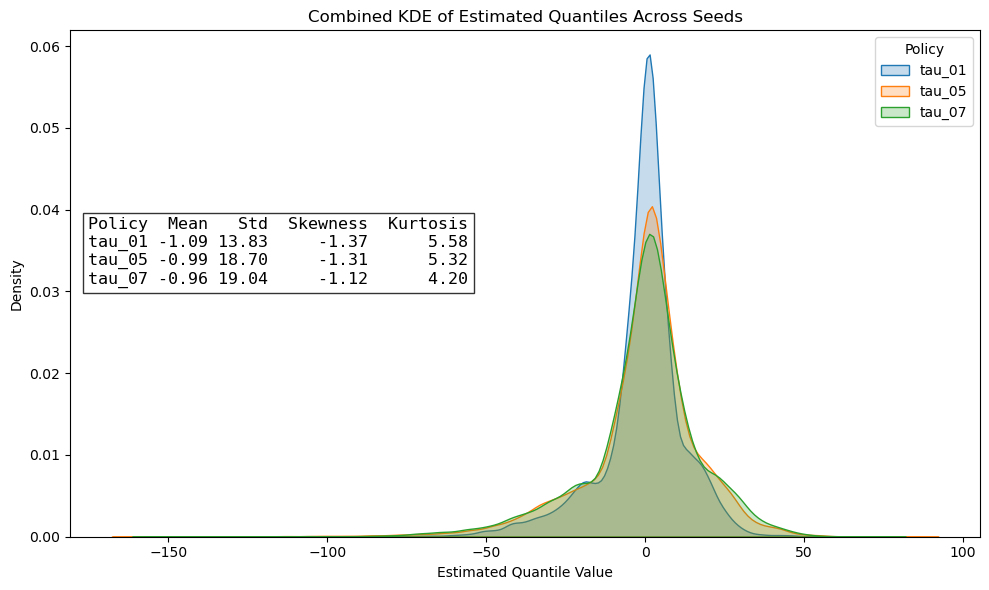

In [18]:
 plot_combined_kde_with_stats(dfs, tau_levels_str)

## What do we expect? Let's compare tau 1 and 3
- Tau_1 should be shifted left because it is trained to optimize for a lower quantile of the return distribution
- lower std
- tau 1 should be right sweked more because it is optimized for lower returns but has a small probability of achieving higher values.
- higher kurtosis

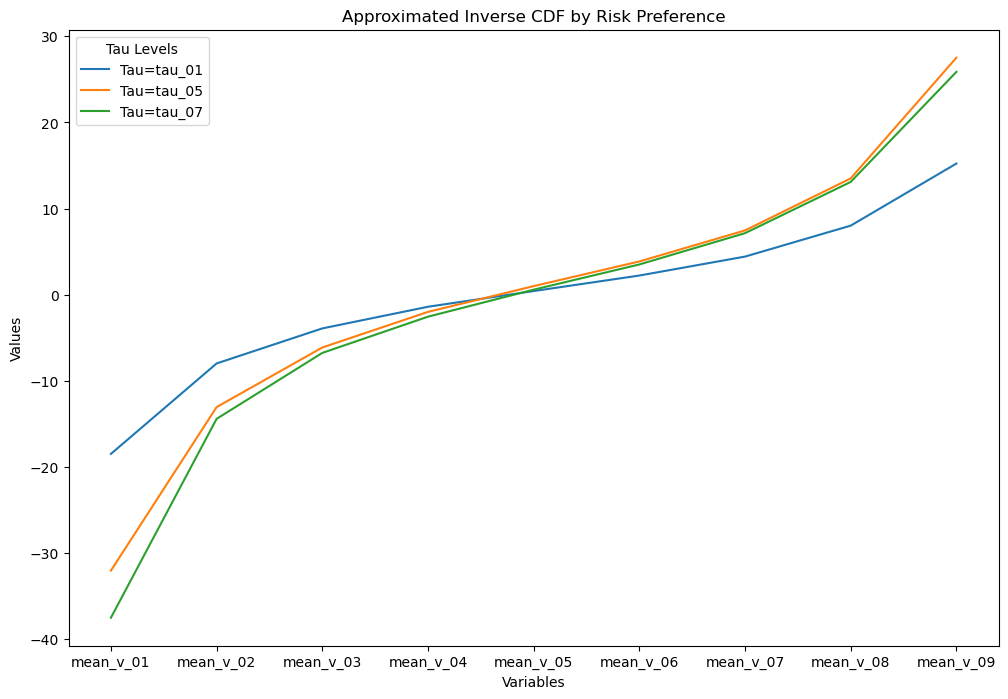

In [19]:
# Plot the above defined 
result.reset_index(inplace=True)
result.rename(columns={"index": "tau"}, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each row in the DataFrame
for index, row in result.iterrows():
    tau_label = row['tau']  
    plt.plot(result.columns[1:], row[1:], label=f"Tau={tau_label}")

plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Approximated Inverse CDF by Risk Preference')
plt.legend(title="Tau Levels")
# plt.savefig('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/inverse_cdf_gauss_sequential.png', dpi=300)

plt.savefig('C:/Users/95att/Desktop/job/First_paper_QAC/QAC-Final/inverse_cdf_gauss_sequential.png', dpi=300)

plt.show()


In [21]:
plot_individual_quantile_kdes(dfs,'05', '07')

AttributeError: 'dict' object has no attribute 'columns'

## What do we expect?
- Each policy is optimized to get the highest discounted value in a specific quantile
- for tau 1 we should get higher mean and lower std for v1
- for tau 7 higher values v7 and lower std
- for higher v-s lower taus are more compressed

## Absolute return distribution

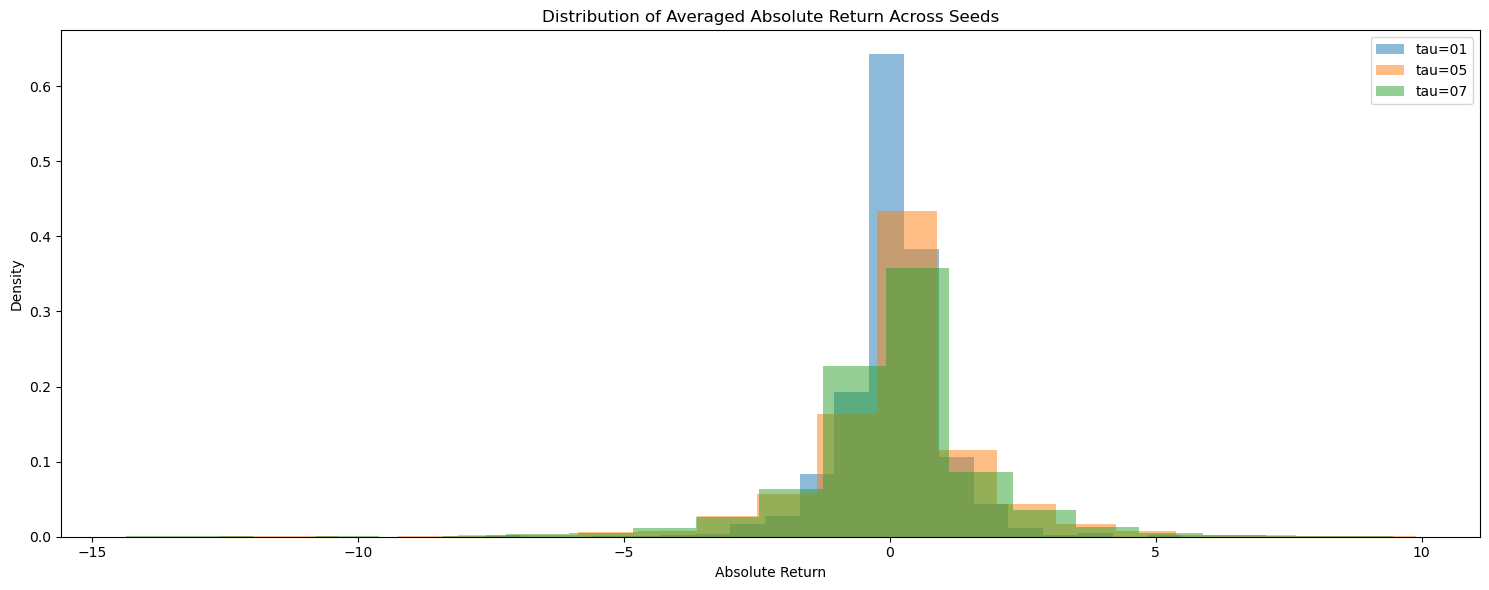

In [232]:
tau_to_abs_returns = {}

for tau_str, seed_dict in dfs.items():
    abs_returns = []
    for seed, df in seed_dict.items():
        if 'absolute_return' in df.columns:
            abs_returns.append(df['absolute_return'].values)

    if abs_returns:
        min_len = min(map(len, abs_returns))
        trimmed = [arr[:min_len] for arr in abs_returns]
        avg_abs_return = np.mean(trimmed, axis=0)
        tau_to_abs_returns[tau_str] = avg_abs_return

# Plot histogram of averaged absolute returns
plt.figure(figsize=(15, 6))
for tau_str, avg_abs in tau_to_abs_returns.items():
    plt.hist(avg_abs, bins=20, alpha=0.5, label=f"tau={tau_str}", density=True)

plt.xlabel('Absolute Return')
plt.ylabel('Density')
plt.title('Distribution of Averaged Absolute Return Across Seeds')
plt.legend()
plt.tight_layout()
plt.show()

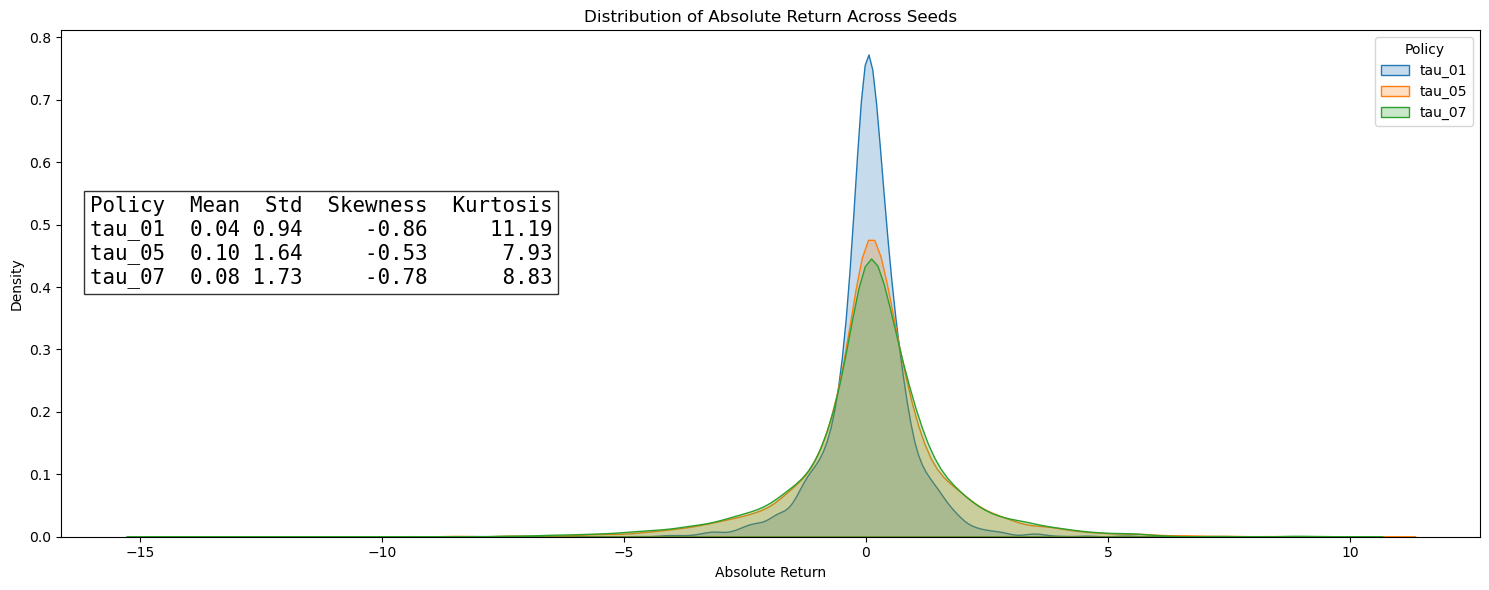

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

plt.figure(figsize=(15, 6))

stats_list = []

for tau_str in tau_levels_str:
    absolute_returns = []

    for seed, df in dfs[tau_str].items():
        if 'absolute_return' in df.columns:
            absolute_returns.append(df['absolute_return'].values)

    if absolute_returns:
        combined = np.concatenate(absolute_returns)
        sns.kdeplot(combined, label=f'tau_{tau_str}', fill=True)

        # Compute stats
        mean_val = np.mean(combined)
        
        std_val = np.std(combined)
        skew_val = skew(combined)
        kurt_val = kurtosis(combined)
        stats_list.append([f'tau_{tau_str}', mean_val, std_val, skew_val, kurt_val])

plt.xlabel('Absolute Return')
plt.ylabel('Density')
plt.title('Distribution of Absolute Return Across Seeds')
plt.legend(title='Policy')

# Add table of statistics
stats_df = pd.DataFrame(stats_list, columns=['Policy', 'Mean', 'Std', 'Skewness', 'Kurtosis'])
stats_text = stats_df.to_string(index=False, float_format=lambda x: f"{x:.2f}")

ax = plt.gca()
ax.text(
    0.02, 0.5, stats_text,
    fontsize=15, family="monospace",
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.tight_layout()
# plt.savefig("absolute_return_distribution_stats_sequential_gauss.png", dpi=300, bbox_inches='tight')

plt.savefig("absolute_return_distribution_stats_sequential_gauss.png", dpi=300, bbox_inches='tight')
plt.show()


## Cumulative reward comparison

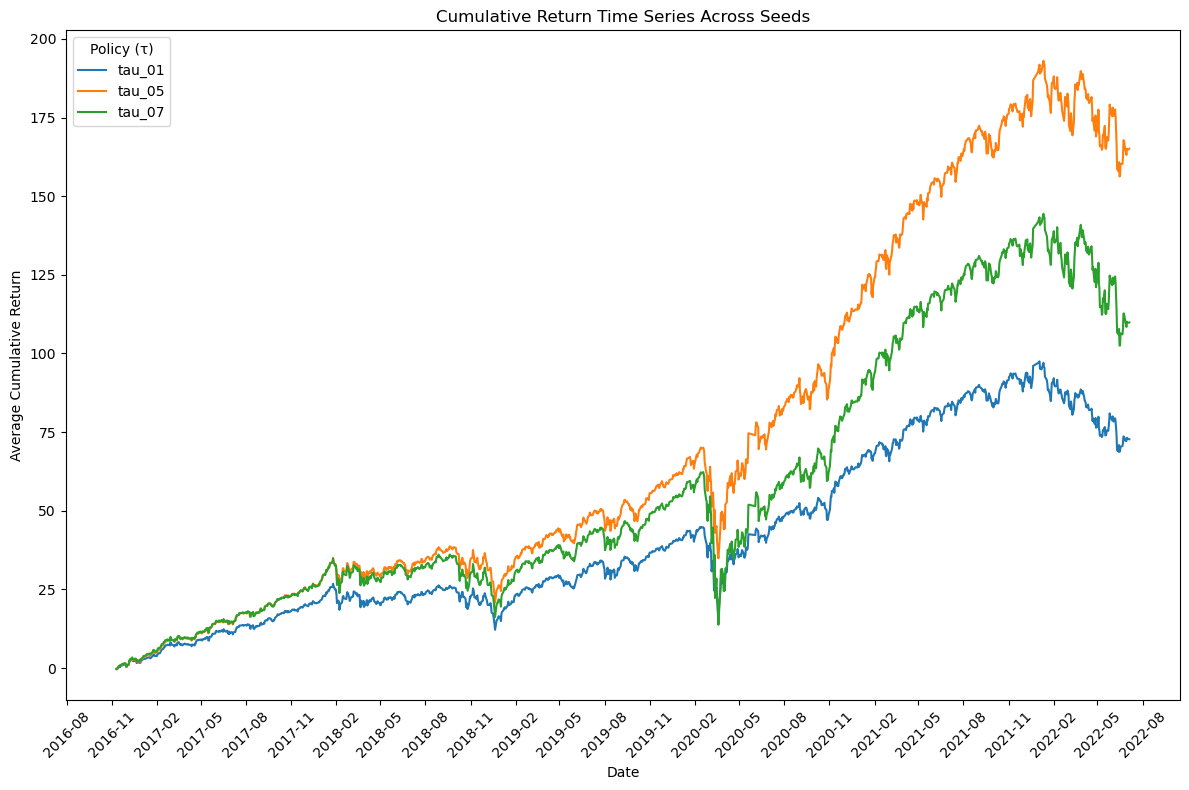

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 8))
ax = plt.gca()

for tau_str in dfs:
    cum_returns_list = []
    date_index = None

    for seed, df in dfs[tau_str].items():
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        if date_index is None:
            date_index = df['date'].values
        cum_returns_list.append(df['cumulative_return'].values)

    avg_cum_return = np.mean(np.stack(cum_returns_list), axis=0)
    plt.plot(date_index, avg_cum_return, label=f'tau_{tau_str}')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))     
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))    

plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.title('Cumulative Return Time Series Across Seeds')
plt.legend(title='Policy (τ)')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("avg_cumulative_returns_by_sequential_gauss_.png", dpi=300, bbox_inches='tight')

plt.savefig("avg_cumulative_returns_by_sequential_dirichlet_.png", dpi=300, bbox_inches='tight')
plt.show()


# Average portfolio holding

Plotting for tau = 01


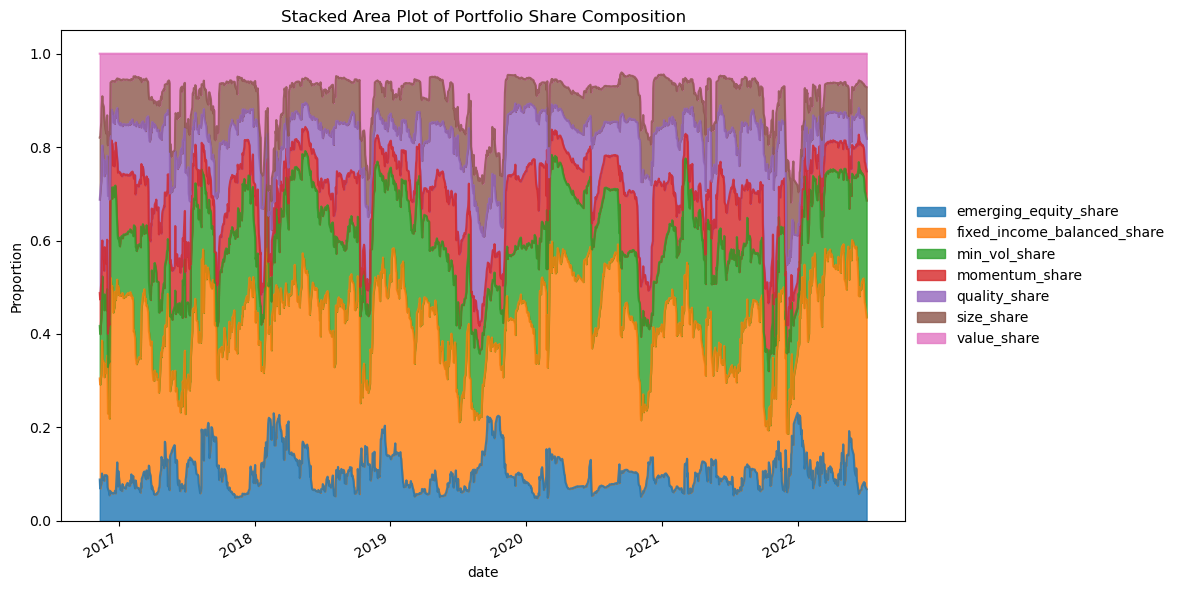

Plotting for tau = 05


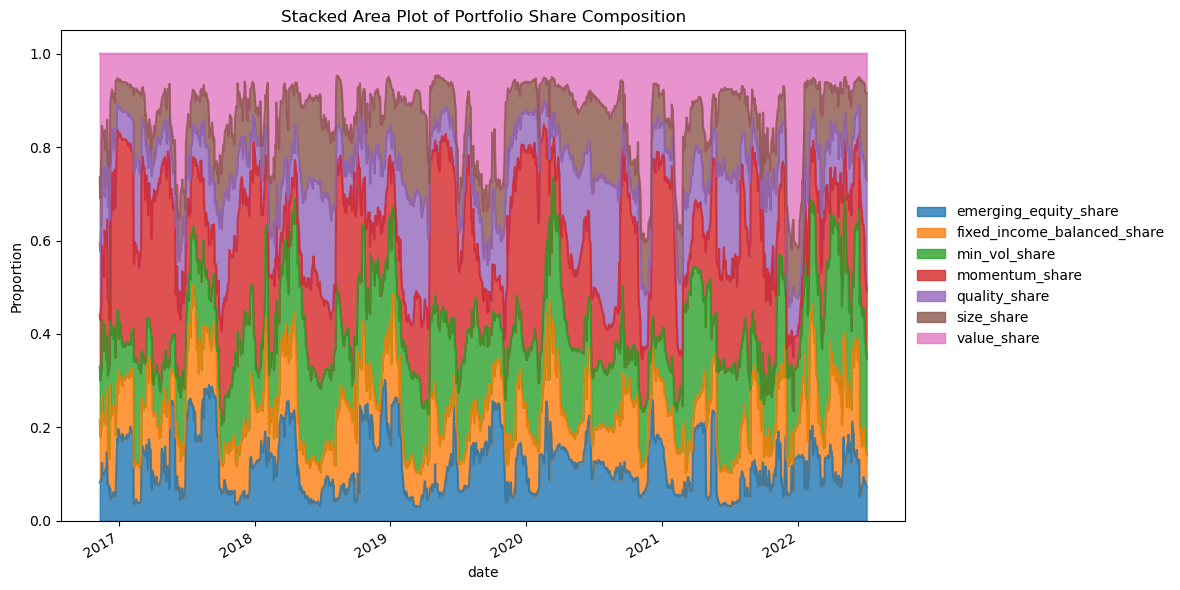

Plotting for tau = 07


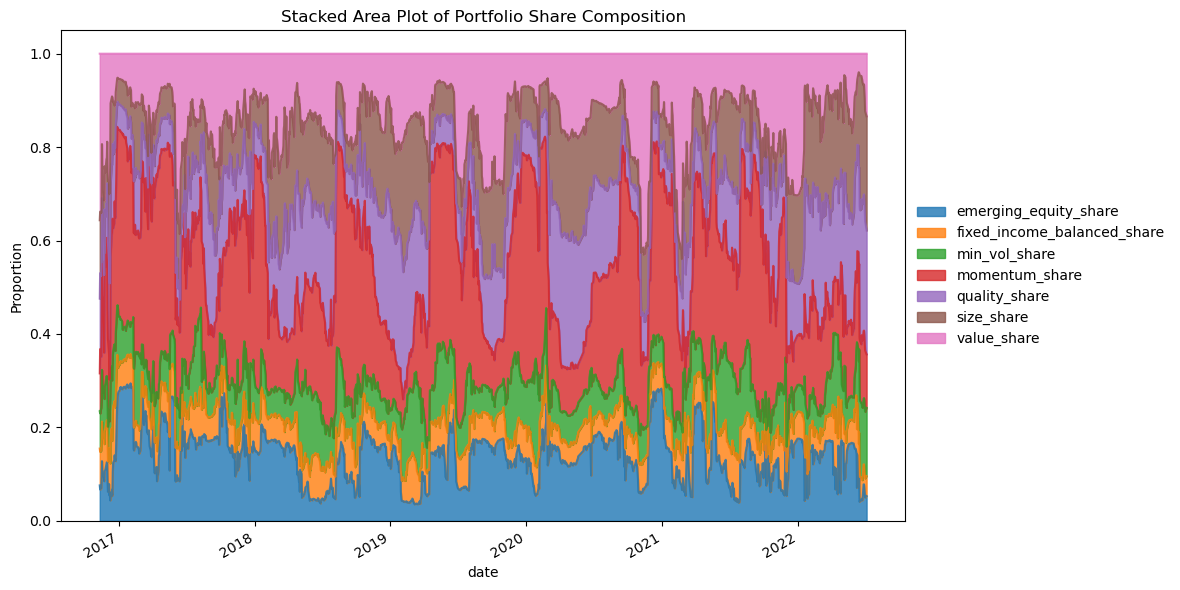

In [21]:
def _plot_shares(df):
    share_cols = [c for c in df.columns if c.endswith('_share')]
    df_shares = df[['date'] + share_cols].copy()
    df_shares['date'] = pd.to_datetime(df_shares['date'])
    df_shares.set_index('date', inplace=True)

    ax = df_shares.plot(kind='area', stacked=True, figsize=(14, 6), alpha=0.8)
    ax.set_ylabel('Proportion')
    ax.set_title('Stacked Area Plot of Portfolio Share Composition First experiment')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

for tau_str in dfs:
    all_seed_dfs = []

    for seed, df in dfs[tau_str].items():
        df = df.copy()
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        share_cols = [c for c in df.columns if c.endswith('_share')]
        df = df[['date'] + share_cols]
        all_seed_dfs.append(df)

    combined_df = pd.concat(all_seed_dfs)
    
    avg_df = combined_df.groupby('date').mean().reset_index() # Group by date per columns

    print(f"Plotting for tau = {tau_str}")
    _plot_shares(avg_df)


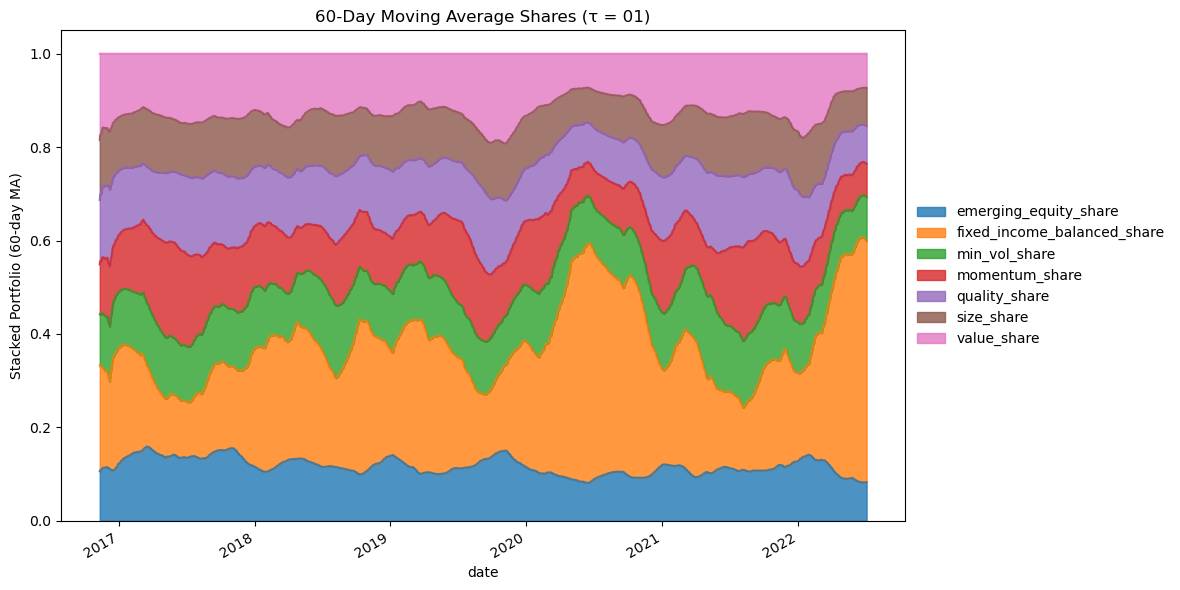

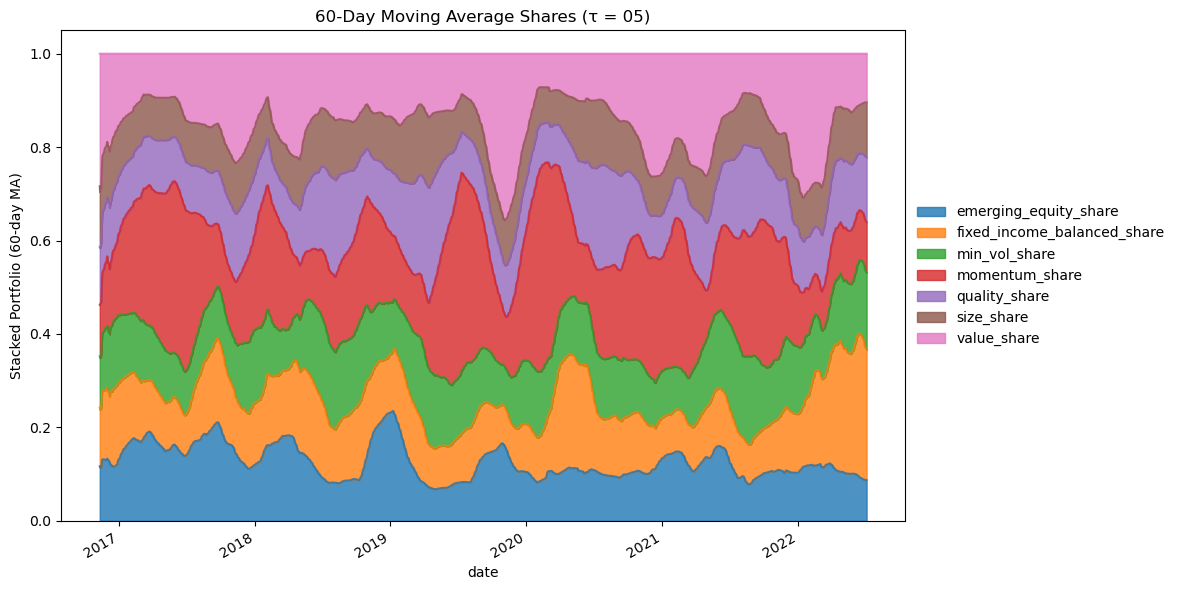

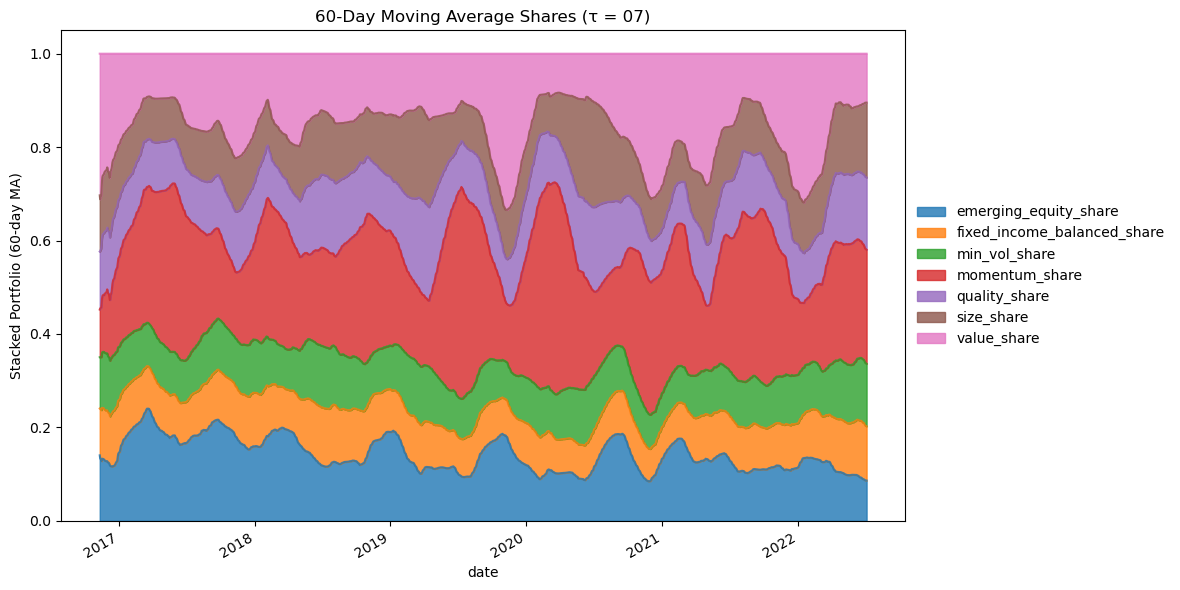

In [62]:
def _plot_smoothed_shares(df, tau_str):
    share_cols = [c for c in df.columns if c.endswith('_share')]
    df_shares = df[['date'] + share_cols].copy()
    df_shares['date'] = pd.to_datetime(df_shares['date'])
    df_shares.set_index('date', inplace=True)

    df_ma = df_shares.rolling(window=60, min_periods=1).mean()

    ax = df_ma.plot(kind='area', stacked=True, figsize=(14, 6), alpha=0.8)
    ax.set_ylabel('Stacked Portfolio (60-day MA)')
    ax.set_title(f'60-Day Moving Average Shares (τ = {tau_str})')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    filename = f"smoothed_shares_tau_sequential_dirichlet{tau_str}.png" # smoothed_shares_tau_sequential_{tau_str}.png
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

share_columns = [
    'emerging_equity_share', 'fixed_income_balanced_share', 'min_vol_share',
    'momentum_share', 'quality_share', 'size_share', 'value_share'
]

for tau_str in dfs:
    all_seed_dfs = []

    for seed, df in dfs[tau_str].items():
        df = df.copy()
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        df = df[['date'] + share_columns]
        all_seed_dfs.append(df)

    combined_df = pd.concat(all_seed_dfs)

    avg_df = combined_df.groupby('date')[share_columns].mean().reset_index()

    _plot_smoothed_shares(avg_df, tau_str)


In [ ]:
#OLD codes on testing data

In [46]:
import pickle
tau_levels = [0.1,0.3,0.5,0.7]
tau_levels_str = [str(tau).replace('.', '') for tau in tau_levels]

dfs_dirichtlet_test = {}
dfs_gauss_test = {}

for tau in tau_levels_str:
    file = f"RUN_2025-03-06_dirichtlet_bayesian_tau_{str(tau).replace('.', '')}"
    df = pd.read_csv(f"training_outcome/{file}/test_df_with_shares.csv")
    dfs_dirichtlet_test[tau] = df


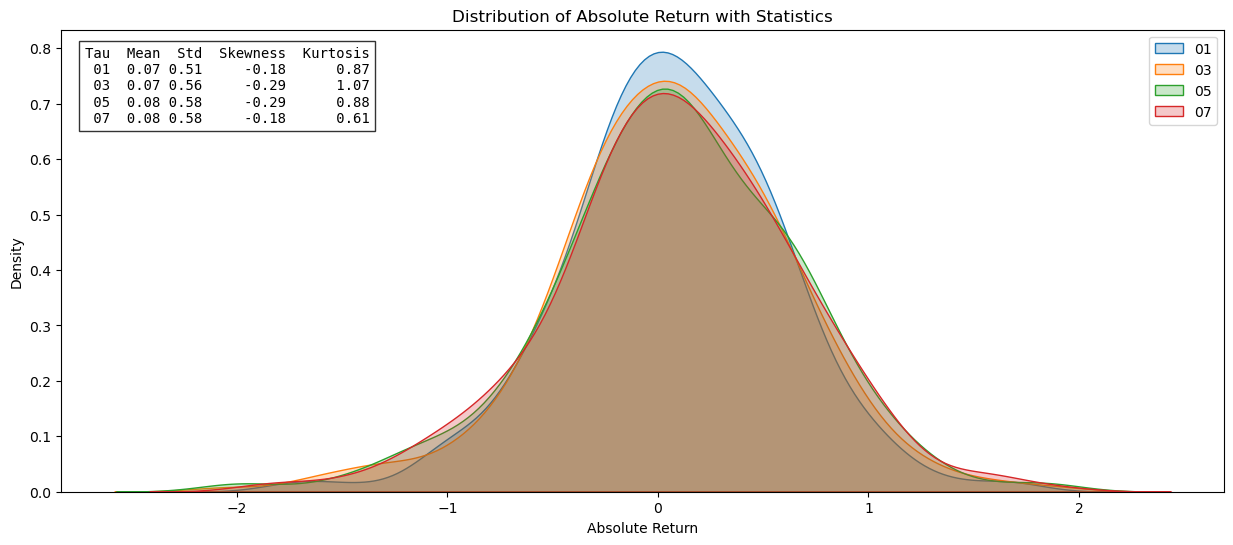

In [48]:
plt.figure(figsize=(15, 6))

# Collect statistics
stats_data = []
for key, df in dfs_dirichtlet_test.items():
    mean_value = df['absolute_return'].mean()
    std_dev = df['absolute_return'].std()
    skewness_value = skew(df['absolute_return'])
    kurtosis_value = kurtosis(df['absolute_return'])
    stats_data.append([key, mean_value,std_dev, skewness_value, kurtosis_value])

    sns.kdeplot(df['absolute_return'], label=key, fill=True)

stats_df = pd.DataFrame(stats_data, columns=['Tau', 'Mean','Std', 'Skewness', 'Kurtosis'])

table_text = stats_df.to_string(index=False, float_format=lambda x: f"{x:.2f}")
plt.text(
    x=0.02, y=0.8, s=table_text, fontsize=10, family="monospace", transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Add labels and title
plt.xlabel('Absolute Return')
plt.ylabel('Density')
plt.title('Distribution of Absolute Return with Statistics')
plt.legend()
plt.show()
plt.show()


In [50]:
stats_df

,Tau,Mean,Std,Skewness,Kurtosis
0,01,0.072929,0.513075,-0.181159,0.867499
1,03,0.068315,0.560778,-0.286264,1.068941
2,05,0.075970,0.584595,-0.285802,0.884200
3,07,0.083110,0.581540,-0.183665,0.606390


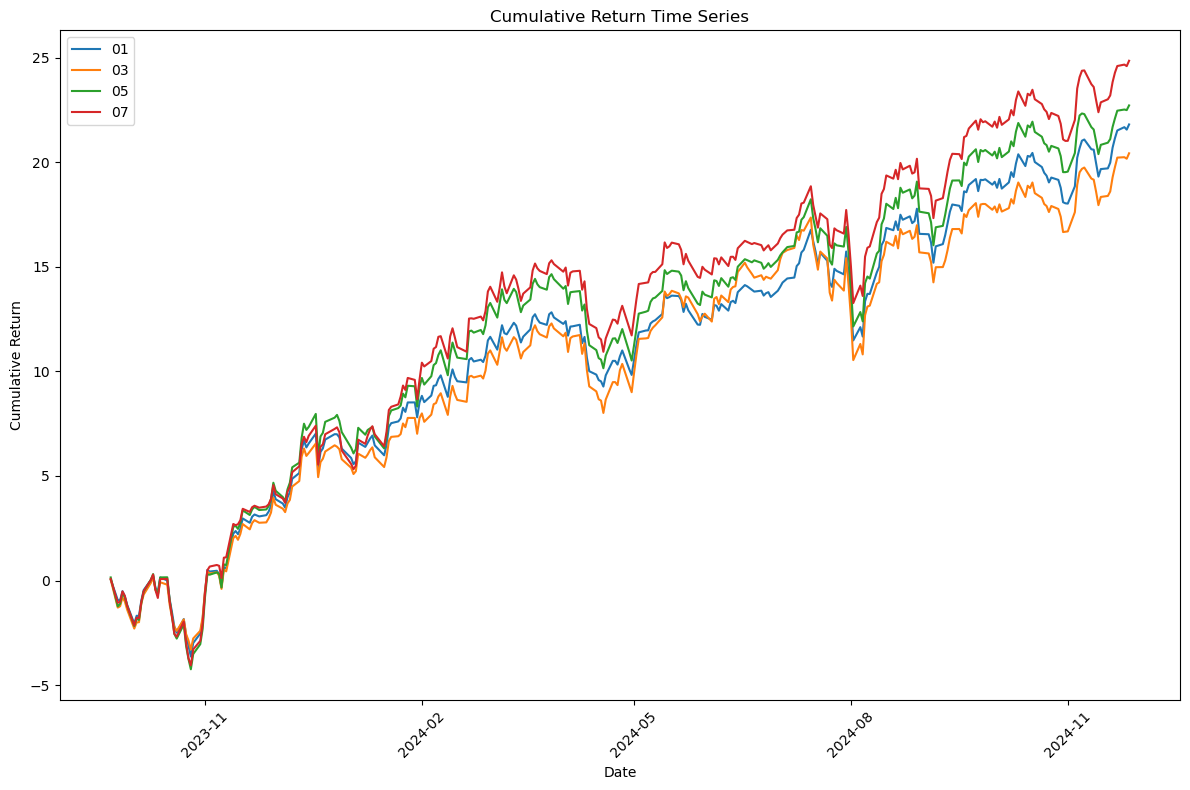

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(12, 8))

ax = plt.gca()  

for key, df in dfs_dirichtlet_test.items():
    # Make sure the date column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    plt.plot(df['date'], df['cumulative_return'], label=key)

# Set quarterly ticks on the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))     
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))    

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Time Series')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# TD ERROR ESTIMATION

In [202]:
dfs_metrics

{}

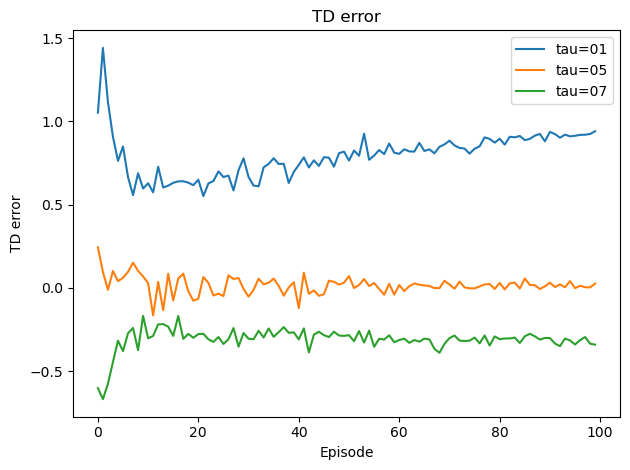

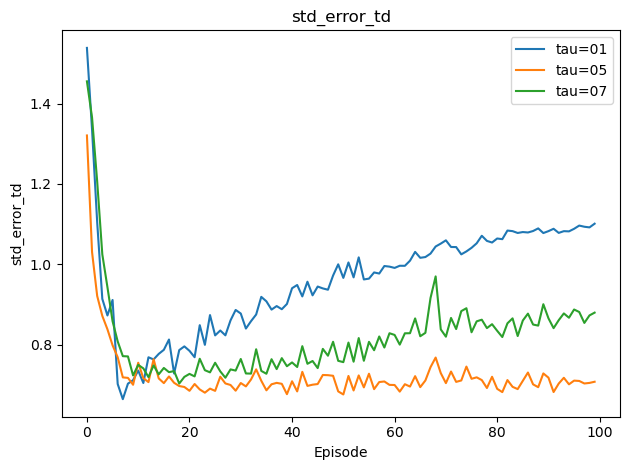

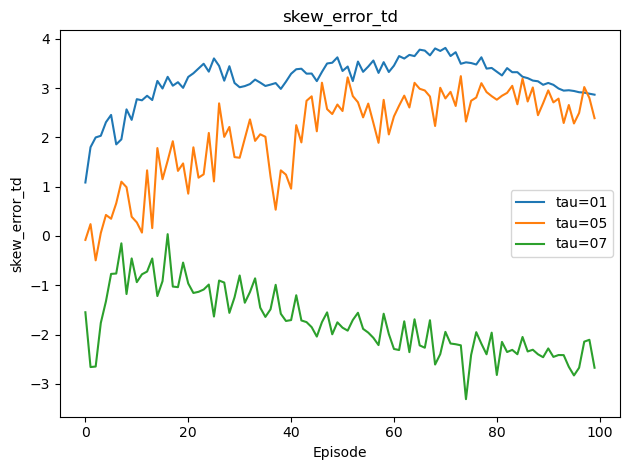

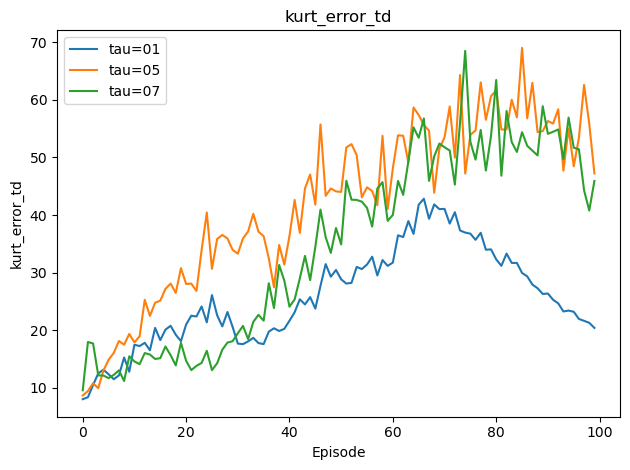

In [225]:
# Use dfs_metrics to extract TD-related metrics per tau and seed
td_metrics_by_tau_seed = {}

# Loop over tau and seed to collect TD metrics only
for tau, seed_dict in dfs_metrics.items():
    td_metrics_by_tau_seed[tau] = {}
    for seed, metrics in seed_dict.items():
        if isinstance(metrics, dict):
            td_metrics = {k: v for k, v in metrics.items() if 'td' in k.lower()}
            td_metrics_by_tau_seed[tau][seed] = td_metrics

# Now average over seeds per tau
tau_avg_td_metrics = {}
td_columns = None

for tau, seed_dict in td_metrics_by_tau_seed.items():
    valid_metrics = [m for m in seed_dict.values() if isinstance(m, dict)]
    if not valid_metrics:
        continue

    if td_columns is None:
        td_columns = [k for k in valid_metrics[0].keys() if 'td' in k.lower()]

    avg_metrics = {}
    for key in td_columns:
        metric_lists = [np.array(metrics[key]) for metrics in valid_metrics if key in metrics]
        min_len = min(map(len, metric_lists))
        aligned = [arr[:min_len] for arr in metric_lists]
        avg_metrics[key] = np.mean(np.stack(aligned), axis=0)

    tau_avg_td_metrics[tau] = avg_metrics

# Plot averaged TD metrics per tau
for metric_name in td_columns:
    plt.figure()
    for tau in tau_avg_td_metrics:
        values = tau_avg_td_metrics[tau][metric_name]
        plt.plot(values, label=f"tau={tau}")
    plt.title(metric_name)
    plt.xlabel("Episode")
    plt.ylabel(metric_name)
    plt.legend()
    plt.tight_layout()
    plt.show()
